X_train shape: torch.Size([28, 3])
y_train shape: torch.Size([28, 1])
X_test shape: torch.Size([7, 3])
y_test shape: torch.Size([7, 1])
Model architecture:
BinaryClassifier(
  (net): Linear(in_features=3, out_features=1, bias=True)
)
Epoch 1/5000, Loss: 0.7343, Accuracy: 0.4286, Test Accuracy: 0.5714
Epoch 501/5000, Loss: 0.6438, Accuracy: 0.5000, Test Accuracy: 0.4286
Epoch 1001/5000, Loss: 0.6098, Accuracy: 0.5714, Test Accuracy: 0.4286
Epoch 1501/5000, Loss: 0.5818, Accuracy: 0.6071, Test Accuracy: 0.5714
Epoch 2001/5000, Loss: 0.5577, Accuracy: 0.6786, Test Accuracy: 0.5714
Epoch 2501/5000, Loss: 0.5368, Accuracy: 0.7500, Test Accuracy: 0.7143
Epoch 3001/5000, Loss: 0.5185, Accuracy: 0.7857, Test Accuracy: 1.0000
Epoch 3501/5000, Loss: 0.5024, Accuracy: 0.7857, Test Accuracy: 1.0000
Epoch 4001/5000, Loss: 0.4881, Accuracy: 0.7857, Test Accuracy: 1.0000
Epoch 4501/5000, Loss: 0.4753, Accuracy: 0.7857, Test Accuracy: 1.0000
Training completed!

Logits:
 tensor([[ 0.7443],
        [-1

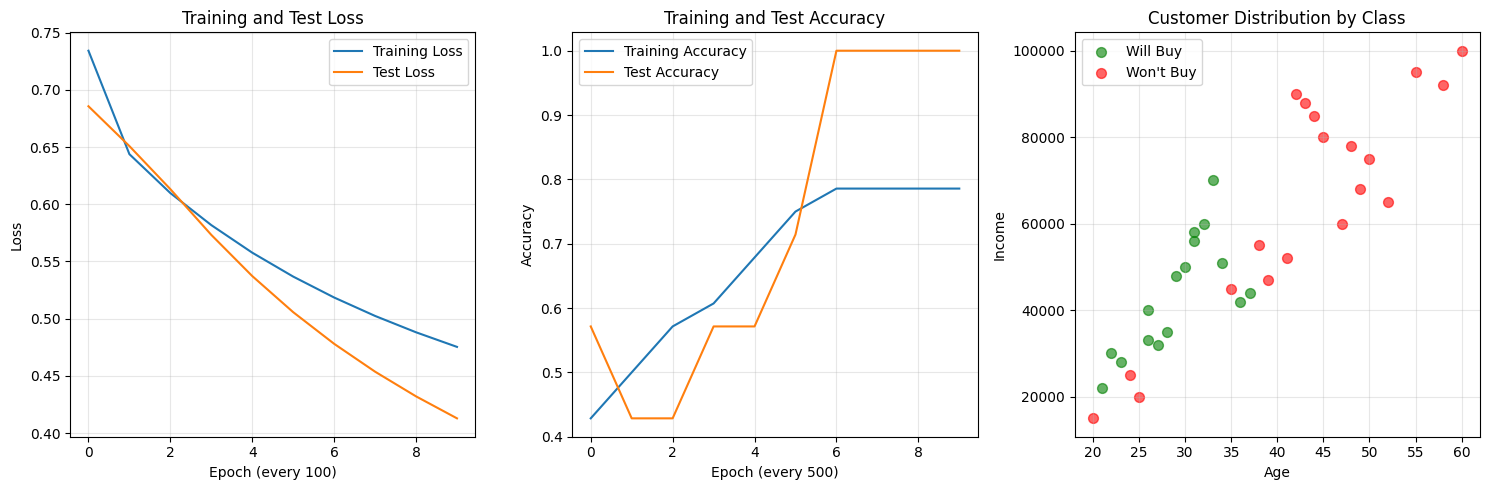


Data Insights:
Average age of buyers: 29.1
Average age of non-buyers: 42.9
Average income of buyers: $43688
Average income of non-buyers: $65000
Average purchases of buyers: 6.6
Average purchases of non-buyers: 4.2


In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Expanded Features: [Age, Income, Past-Purchases]
X_np = np.array([
    # Young customers with varying behaviors
    [22., 30000., 2.],   # Young, low income, few purchases - WILL BUY
    [25., 20000., 1.],   # Young, very low income, one purchase - WON'T BUY
    [28., 35000., 3.],   # Young, moderate income, some purchases - WILL BUY
    [24., 25000., 0.],   # Young, low income, no purchases - WON'T BUY
    [26., 40000., 4.],   # Young, decent income, regular purchases - WILL BUY

    # Middle-aged customers
    [30., 50000., 5.],   # Established career, regular customer - WILL BUY
    [35., 45000., 2.],   # Middle-aged, moderate income, infrequent - WON'T BUY
    [32., 60000., 6.],   # Good income, frequent purchases - WILL BUY
    [38., 55000., 3.],   # Decent income, occasional purchases - WON'T BUY
    [33., 70000., 8.],   # High income, very frequent - WILL BUY

    # Older customers
    [45., 80000., 10.],  # High income, loyal customer - WON'T BUY (saturated)
    [50., 75000., 4.],   # High income, selective purchases - WON'T BUY
    [42., 90000., 12.],  # Very high income, frequent - WON'T BUY (saturated)
    [47., 60000., 3.],   # Moderate-high income, occasional - WON'T BUY
    [55., 95000., 5.],   # Very high income, selective - WON'T BUY

    # Various age groups mixed
    [29., 48000., 7.],   # Young professional, frequent - WILL BUY
    [41., 52000., 2.],   # Middle-aged, moderate, infrequent - WON'T BUY
    [27., 32000., 5.],   # Young, growing career, engaged - WILL BUY
    [44., 85000., 1.],   # High income, rarely buys - WON'T BUY
    [31., 58000., 9.],   # Established, very engaged - WILL BUY

    # Edge cases
    [20., 15000., 0.],   # Very young, very low income - WON'T BUY
    [60., 100000., 15.], # Senior, very high income, very loyal - WON'T BUY
    [23., 28000., 6.],   # Young, building loyalty - WILL BUY
    [52., 65000., 2.],   # Older, comfortable, not active - WON'T BUY
    [36., 42000., 8.],   # Middle, moderate income, very active - WILL BUY

    # Additional patterns
    [39., 47000., 4.],   # Middle-aged, average income, occasional - WON'T BUY
    [26., 33000., 7.],   # Young, average income, very active - WILL BUY
    [48., 78000., 6.],   # Older, high income, somewhat active - WON'T BUY
    [34., 51000., 11.],  # Established, good income, very loyal - WILL BUY
    [43., 88000., 2.],   # High income, rarely shops - WON'T BUY

    # More diverse examples
    [21., 22000., 3.],   # Student, low income, somewhat active - WILL BUY
    [58., 92000., 7.],   # Senior, wealthy, moderate activity - WON'T BUY
    [37., 44000., 9.],   # Middle, average income, very active - WILL BUY
    [49., 68000., 1.],   # Older, comfortable, inactive - WON'T BUY
    [31., 56000., 12.],  # Young professional, very engaged - WILL BUY
], dtype=np.float32)

# 1=Will buy, 0=Won't buy
y_np = np.array([
    [1.], [0.], [1.], [0.], [1.],  # 1-5
    [1.], [0.], [1.], [0.], [1.],  # 6-10
    [0.], [0.], [0.], [0.], [0.],  # 11-15
    [1.], [0.], [1.], [0.], [1.],  # 16-20
    [0.], [0.], [1.], [0.], [1.],  # 21-25
    [0.], [1.], [0.], [1.], [0.],  # 26-30
    [1.], [0.], [1.], [0.], [1.],  # 31-35
], dtype=np.float32)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_np)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, y_np, test_size=0.2, random_state=42
)

# Convert to tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

class BinaryClassifier(nn.Module):
    def __init__(self, in_dim, hidden = 8):
        super().__init__()
        self.net = nn.Linear(in_dim, 1)

    def forward(self, x):
        return self.net(x)

model = BinaryClassifier(in_dim=3)
print("Model architecture:")
print(model)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
train_losses, test_losses = [], []
train_accs, test_accs = [], []

EPOCHS = 5000
for epoch in range(EPOCHS):
    model.train()  # Set model to training mode

    # Forward pass: make predictions
    logits = model(X_train)
    loss = loss_fn(logits, y_train)  # Calculate error

    # FIX 3: Calculate predictions and accuracy correctly
    with torch.no_grad():
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        # Convert tensors to numpy for accuracy_score
        acc = accuracy_score(y_train.numpy(), preds.numpy())

    # Backward pass: learn from mistakes
    optimizer.zero_grad()    # Clear previous gradients
    loss.backward()          # Calculate new gradients
    optimizer.step()         # Update model weights

    # Evaluation on test set
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs >= 0.5).float()
        t_acc = accuracy_score(y_test.numpy(), test_preds.numpy())
        t_loss = loss_fn(test_logits, y_test).item()

    if epoch % 500 == 0:
        print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {loss.item():.4f}, "
              f"Accuracy: {acc:.4f}, Test Accuracy: {t_acc:.4f}")
        train_losses.append(loss.item())
        train_accs.append(acc)
        test_losses.append(t_loss)
        test_accs.append(t_acc)

print("Training completed!")

# Evaluation
model.eval()
with torch.inference_mode():
    # Forward pass: make predictions
    logits = model(X_test)
    probs = torch.sigmoid(logits)
    preds = (probs >= 0.5).float()

print("\nLogits:\n", logits)
print("\nProbabilities:\n", probs)
print("\nPredicted Classes:\n", preds)
print("\nActual Classes:\n", y_test)

# Plotting results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch (every 100)")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel("Epoch (every 500)")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)

# Feature distribution analysis
plt.subplot(1, 3, 3)
will_buy = X_np[y_np.flatten() == 1]
wont_buy = X_np[y_np.flatten() == 0]

plt.scatter(will_buy[:, 0], will_buy[:, 1], c='green', alpha=0.6, label='Will Buy', s=50)
plt.scatter(wont_buy[:, 0], wont_buy[:, 1], c='red', alpha=0.6, label="Won't Buy", s=50)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some insights
print("\nData Insights:")
print(f"Average age of buyers: {np.mean(will_buy[:, 0]):.1f}")
print(f"Average age of non-buyers: {np.mean(wont_buy[:, 0]):.1f}")
print(f"Average income of buyers: ${np.mean(will_buy[:, 1]):.0f}")
print(f"Average income of non-buyers: ${np.mean(wont_buy[:, 1]):.0f}")
print(f"Average purchases of buyers: {np.mean(will_buy[:, 2]):.1f}")
print(f"Average purchases of non-buyers: {np.mean(wont_buy[:, 2]):.1f}")
